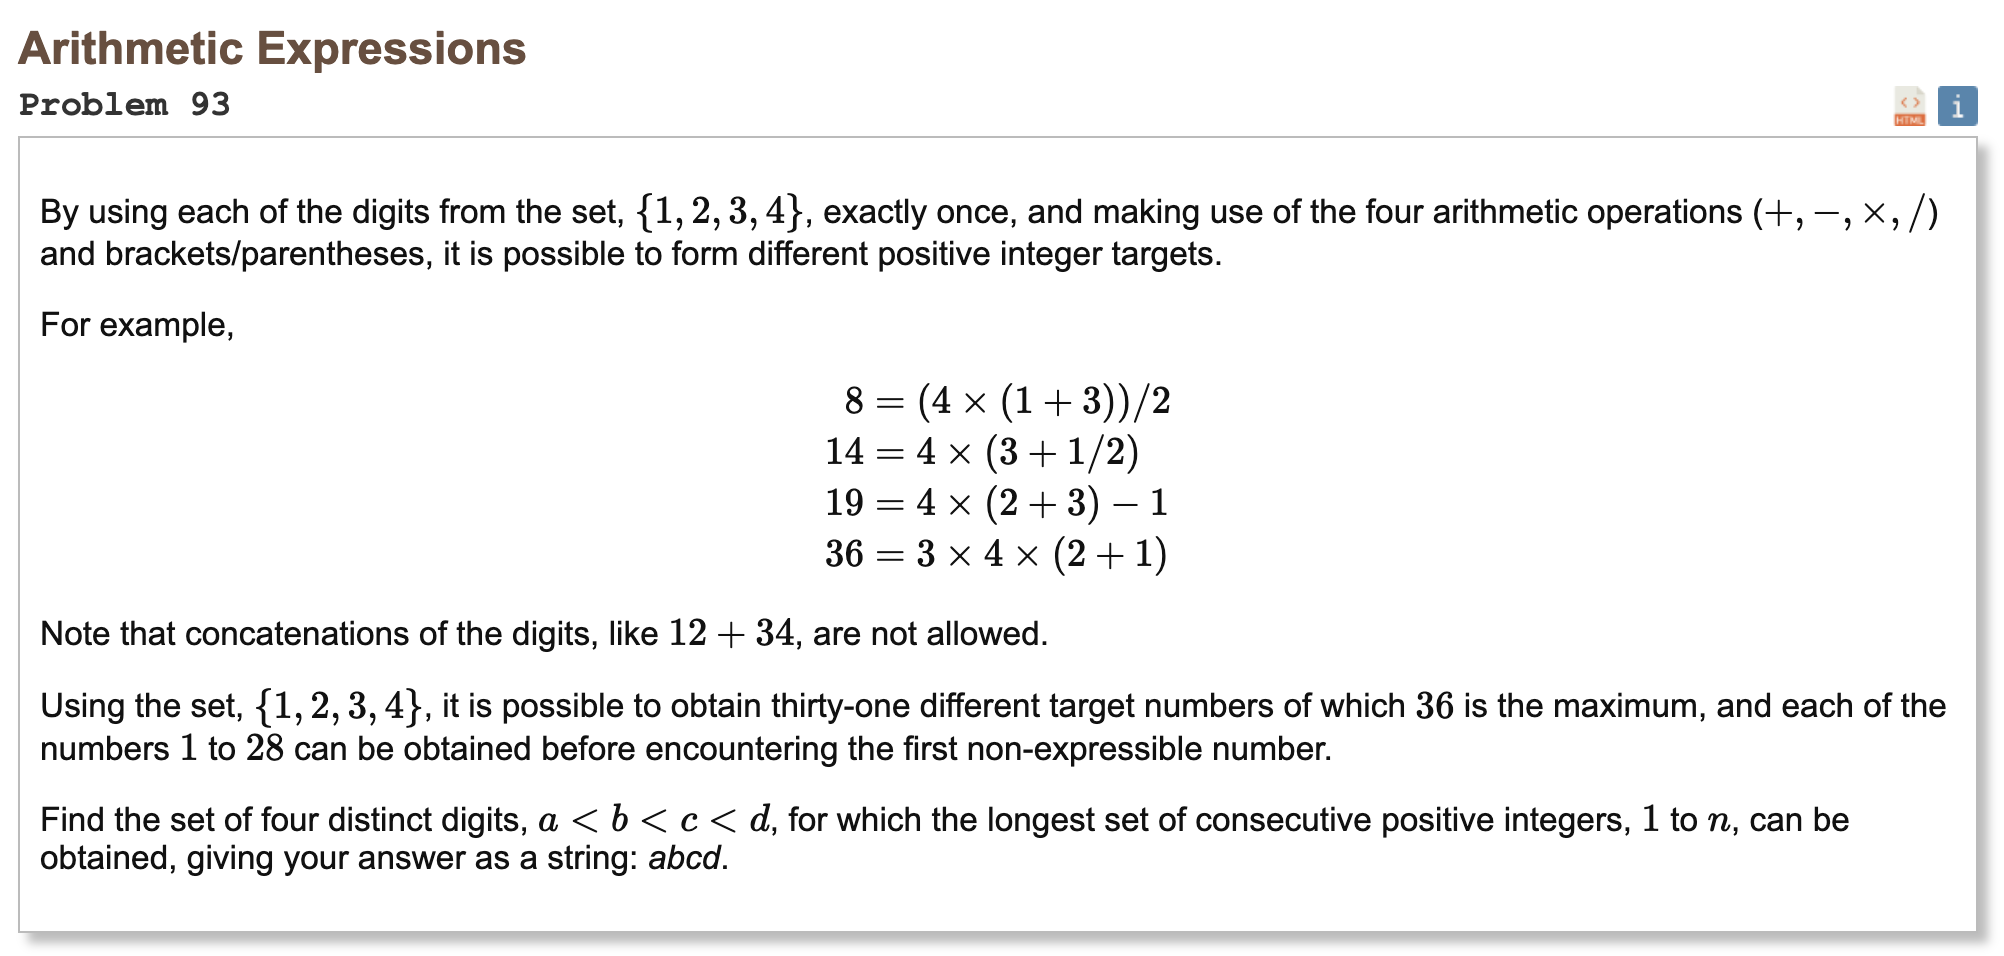

## Initial approach

* choose 4 diffferent digits from 1 to 9
* use any order, any combinations of operators and any brackets
* evaluate all possible outcome
* collect all results that are positive integers
* find how many consecutive numbers starting from 1 can be made
* the goal is to find the 4 digits that produce the longest such sequence


In [1]:
import itertools

* define a function that returns all positive integers that can be made using 4 digits with any order, operator and parantheses.

In [2]:
def all_expressions(a, b, c, d):
    results = set()
    numbers = [a, b, c, d]
    operations = ['+', '-', '*', '/']

    for nums in itertools.permutations(numbers):
        for ops in itertools.product(operations, repeat=3):
            exp1 = f"(({nums[0]}{ops[0]}{nums[1]}){ops[1]}{nums[2]}){ops[2]}{nums[3]}"
            exp2 = f"({nums[0]}{ops[0]}({nums[1]}{ops[1]}{nums[2]})){ops[2]}{nums[3]}"
            exp3 = f"{nums[0]}{ops[0]}(({nums[1]}{ops[1]}{nums[2]}){ops[2]}{nums[3]})"
            exp4 = f"{nums[0]}{ops[0]}({nums[1]}{ops[1]}({nums[2]}{ops[2]}{nums[3]}))"
            exp5 = f"({nums[0]}{ops[0]}{nums[1]}){ops[1]}({nums[2]}{ops[2]}{nums[3]})"

            for exp in [exp1, exp2, exp3, exp4, exp5]:
                try:
                    value = eval(exp)
                    if value == int(value) and value > 0:
                        results.add(int(value))
                except:
                    pass
    return results

In [3]:
%%time

max_length = 0
best_digits = ()

for combo in itertools.combinations(range(1, 10), 4):
    values = all_expressions(*combo)
    i = 1
    while i in values:
        i += 1
    if i - 1 > max_length:
        max_length = i - 1
        best_digits = combo

result = ''.join(map(str, sorted(best_digits)))
print("Result:", result)

Result: 1258
CPU times: user 5.49 s, sys: 16.3 ms, total: 5.5 s
Wall time: 5.5 s
